In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
#import warnings
#warnings.filterwarnings("ignore")


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [2]:
df = pd.read_csv(r"C:\Users\rocki\Documents\2 сем\ТМО\Expanded_data_with_more_features.csv")
df = df.replace(',', '.', regex=True)

In [3]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


## Удалим пропуски: 

In [4]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [5]:
draw_missing(df).round(1)

,Total,Percent
TransportMeans,3134,10.2
ParentEduc,1845,6.0
EthnicGroup,1840,6.0
TestPrep,1830,6.0
NrSiblings,1572,5.1
ParentMaritalStatus,1190,3.9
WklyStudyHours,955,3.1
IsFirstChild,904,3.0
PracticeSport,631,2.1
Unnamed: 0,0,0.0


In [6]:
df = df.dropna()

In [7]:
draw_missing(df).round(1)

,Total,Percent
Unnamed: 0,0,0.0
Gender,0,0.0
EthnicGroup,0,0.0
ParentEduc,0,0.0
LunchType,0,0.0
TestPrep,0,0.0
ParentMaritalStatus,0,0.0
PracticeSport,0,0.0
IsFirstChild,0,0.0
NrSiblings,0,0.0


## Закодируем категориальные признаки:

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df['IsFirstChild'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
df['IsFirstChild'] = df['IsFirstChild'].map({'yes':1, 'no':0})

In [11]:
df['ParentEduc'].unique()

array(["master's degree", 'some college', "associate's degree",
       'high school', 'some high school', "bachelor's degree"],
      dtype=object)

In [12]:
df['ParentEduc'] = df['ParentEduc'].map({"master's degree":5, "some college":3, "associate's degree":2, "some high school":1, "high school":1, "bachelor's degree":4  })

In [13]:
df['PracticeSport'].unique()

array(['sometimes', 'regularly', 'never'], dtype=object)

In [14]:
df['PracticeSport'] = df['PracticeSport'].map({'sometimes':1, 'regularly':2, 'never':0})

In [15]:
df['TestPrep'].unique()

array(['none', 'completed'], dtype=object)

In [16]:
df['TestPrep'] = df['TestPrep'].map({'completed':1, 'none':0})

In [17]:
le = LabelEncoder()
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        df[col] = le.fit_transform(df[col])
        print(col)

Gender
EthnicGroup
LunchType
ParentMaritalStatus
TransportMeans
WklyStudyHours


In [18]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,0,1,5,1,0,2,1,1,4.0,1,1,87,93,91
4,4,1,2,3,1,0,1,1,1,0.0,1,0,76,78,75
5,5,0,1,2,1,0,1,2,1,1.0,1,0,73,84,79
6,6,0,1,3,1,1,3,0,0,1.0,0,0,85,93,89
7,7,1,1,3,0,0,1,1,1,1.0,0,2,41,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,794,1,2,3,1,0,1,2,0,2.0,1,0,58,53,49
30636,816,0,3,1,1,0,2,1,0,2.0,1,0,59,61,65
30637,890,1,4,1,1,0,2,2,0,1.0,0,0,58,53,51
30639,934,0,3,2,1,1,1,2,0,3.0,1,0,82,90,93


## Разделим выборку на обучающую и тестовую

In [19]:
goal_column='WritingScore'

In [20]:
X = df.drop(goal_column, axis=1)
X

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore
2,2,0,1,5,1,0,2,1,1,4.0,1,1,87,93
4,4,1,2,3,1,0,1,1,1,0.0,1,0,76,78
5,5,0,1,2,1,0,1,2,1,1.0,1,0,73,84
6,6,0,1,3,1,1,3,0,0,1.0,0,0,85,93
7,7,1,1,3,0,0,1,1,1,1.0,0,2,41,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,794,1,2,3,1,0,1,2,0,2.0,1,0,58,53
30636,816,0,3,1,1,0,2,1,0,2.0,1,0,59,61
30637,890,1,4,1,1,0,2,2,0,1.0,0,0,58,53
30639,934,0,3,2,1,1,1,2,0,3.0,1,0,82,90


In [21]:
Y = df[[goal_column]]
Y

,WritingScore
2,91
4,75
5,79
6,89
7,39
...,...
30635,49
30636,65
30637,51
30639,93


In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

С использованием метода train_test_split разделим выборку на обучающую и тестовую

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [24]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (15394, 14)
X_test: (3849, 14)
Y_train: (15394, 1)
Y_test: (3849, 1)


## Обучение моделей

### Линейная модель регрессии

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

<AxesSubplot:>

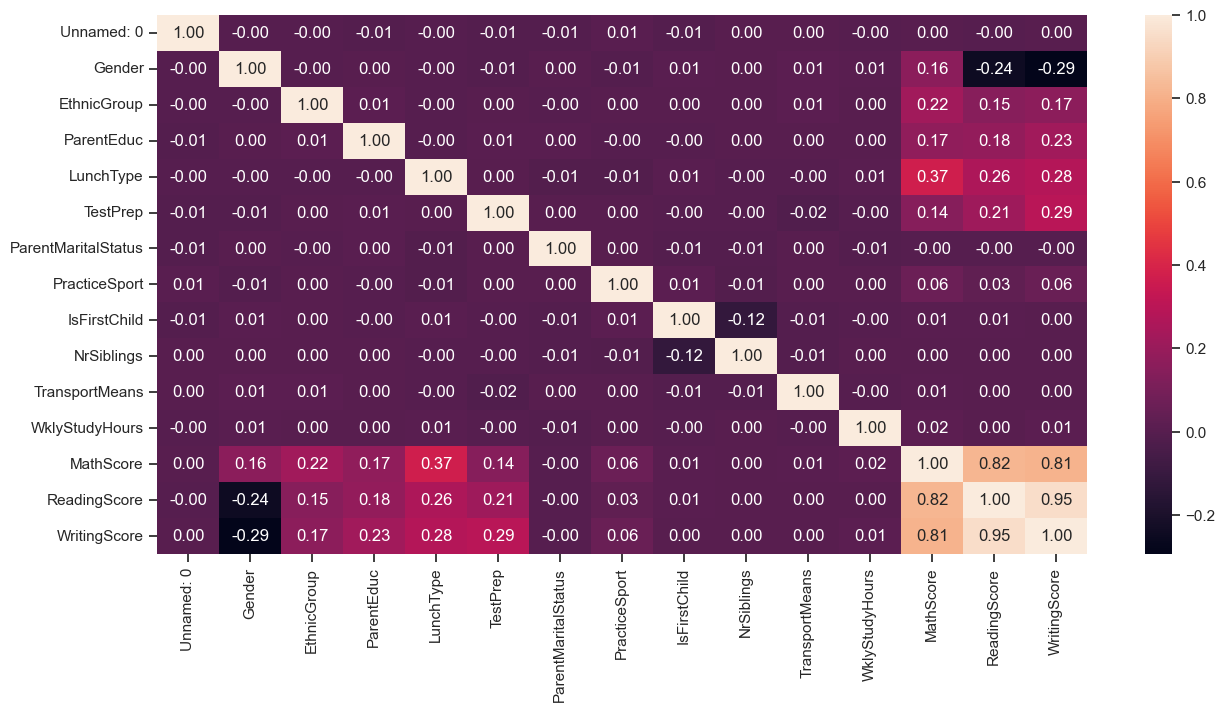

In [26]:

fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

<AxesSubplot:xlabel='ReadingScore', ylabel='WritingScore'>

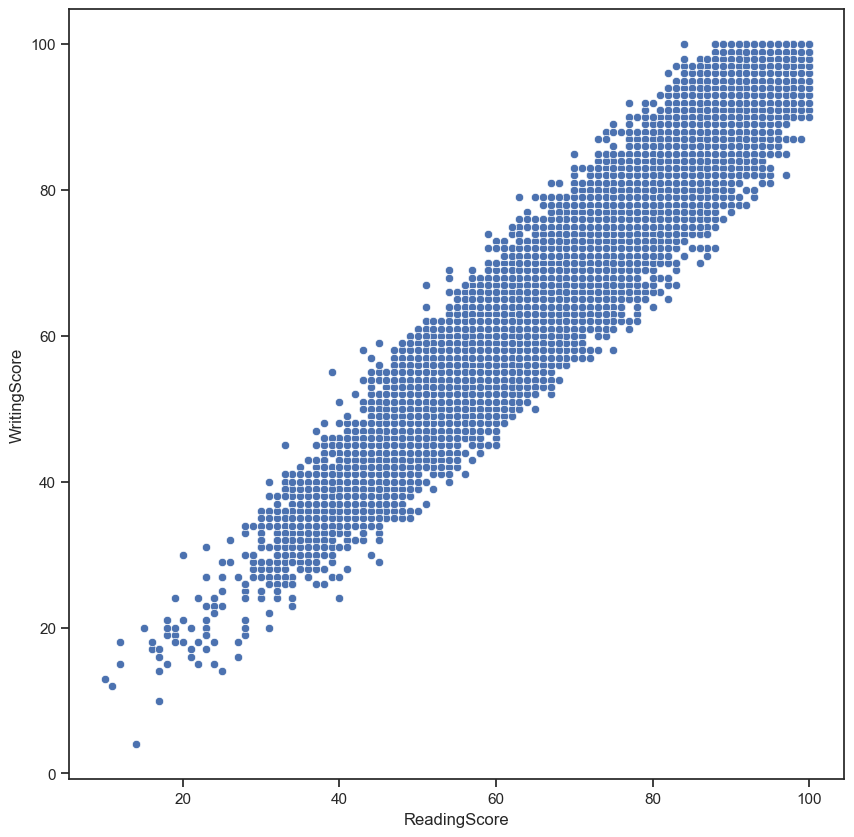

In [27]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='ReadingScore', y='WritingScore', data=df)

Между признаками "ReadingScore" и "WritingScore" прослеживается линейная зависимость (коэффициент корреляции = 0.95).

## Аналитическое вычисление коэффициентов регрессии

In [28]:
from typing import Dict, Tuple

In [29]:
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-y_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [30]:
x_array = df['ReadingScore'].values
y_array = df['WritingScore'].values

Коэффициенты регрессии:

In [31]:
b0, b1 = analytic_regr_coef(x_array, y_array)
b0, b1

(-0.7563730314151655, 0.9974820699716694)

Отрисовка зависимости:

In [32]:
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [33]:
regr_a = y_regr(x_array, b0, b1)

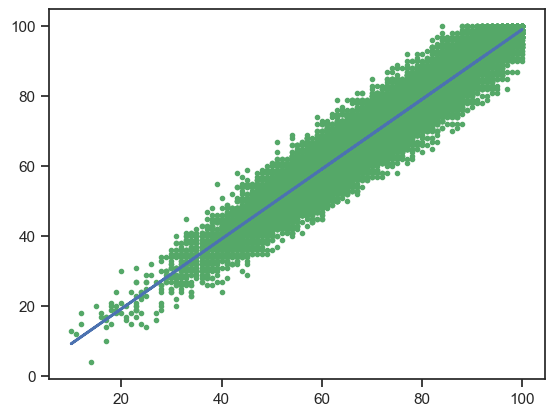

In [34]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, regr_a, 'b', linewidth=2.0)
plt.show()

## Метод наименьших квадратов

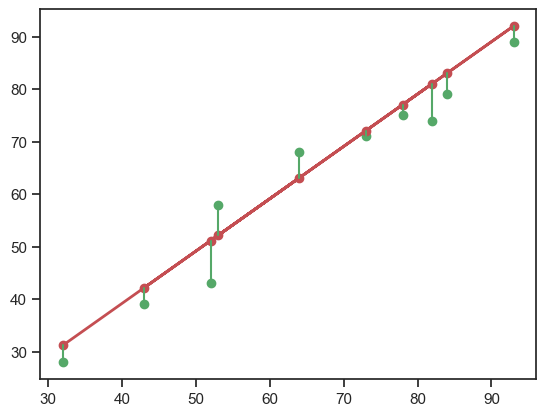

In [35]:
K_mnk=10

plt.plot(x_array[1:K_mnk+1], y_array[1:K_mnk+1], 'go')
plt.plot(x_array[1:K_mnk+1], regr_a[1:K_mnk+1], '-ro', linewidth=2.0)

for i in range(len(x_array[1:K_mnk+1])):
    x1 = x_array[1:K_mnk+1][i]
    y1 = y_array[1:K_mnk+1][i]
    y2 = regr_a[1:K_mnk+1][i]
    plt.plot([x1,x1],[y1,y2],'g-')

plt.show()

Зеленые отрезки - ошибки между истинными и предсказанными значениями.

## Решение задачи оптимизации - градиентный спуск

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
def gradient_descent(x_array : np.ndarray,
                     y_array : np.ndarray,
                     b0_0 : float,
                     b1_0 : float,
                     epochs : int,
                     learning_rate : float = 0.001
                    ) -> Tuple[float, float]:
    b0, b1 = b0_0, b1_0
    k = float(len(x_array))
    for i in range(epochs): 
        y_pred = b1 * x_array + b0
        dL_db1 = (-2/k) * np.sum(np.multiply(x_array, (y_array - y_pred)))
        dL_db0 = (-2/k) * np.sum(y_array - y_pred)
        b1 = b1 - learning_rate * dL_db1
        b0 = b0 - learning_rate * dL_db0
    y_pred = b1 * x_array + b0
    return b0, b1, y_pred

In [38]:
def show_gradient_descent(epochs, b0_0, b1_0):
    grad_b0, grad_b1, grad_y_pred = gradient_descent(x_array, y_array, b0_0, b1_0, epochs)
    print('b0 = {} - (теоретический), {} - (градиентный спуск)'.format(b0, grad_b0))
    print('b1 = {} - (теоретический), {} - (градиентный спуск)'.format(b1, grad_b1))
    print('MSE = {}'.format(mean_squared_error(regr_a, grad_y_pred)))
    plt.plot(x_array, y_array, 'g.')
    plt.plot(x_array, regr_a, 'b', linewidth=2.0)
    plt.plot(x_array, grad_y_pred, 'r', linewidth=2.0)
    plt.show()

b0 = -0.7563730314151655 - (теоретический), 0.13720573715117187 - (градиентный спуск)
b1 = 0.9974820699716694 - (теоретический), 9.976609468378113 - (градиентный спуск)
MSE = 408563.63132137473


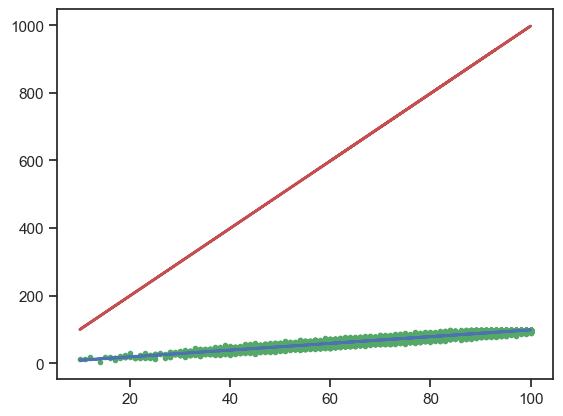

In [39]:
show_gradient_descent(1, 0, 0)

Добьемся сходимости алгоритма путем задания других коэффициентов:

b0 = -0.7563730314151655 - (теоретический), -0.9499629111884841 - (градиентный спуск)
b1 = 0.9974820699716694 - (теоретический), 1.0014781011276832 - (градиентный спуск)
MSE = 0.010592356171414168


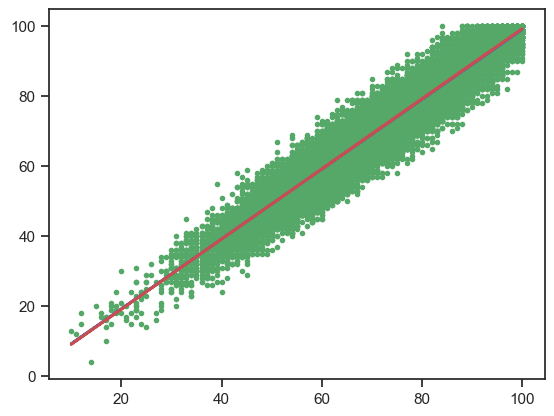

In [40]:
show_gradient_descent(1, -0.95, 1)

## Подбор коэффициентов через LinearRegression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
regr1 = LinearRegression().fit(x_array.reshape(-1, 1), y_array.reshape(-1, 1))
(b1, regr1.coef_), (b0, regr1.intercept_)

((0.9974820699716694, array([[0.99748207]])),
 (-0.7563730314151655, array([-0.75637303])))


Линейная модель:

In [43]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

## SVM модель

Будем использовать класс SVR для решения задачи регрессии методом опорных векторов:

In [44]:
from sklearn.svm import SVR

Модель SVM:

## Дерево решений

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
def stat_tree(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("Всего узлов:", n_nodes)
    print("Листовых узлов:", sum(is_leaves))
    print("Глубина дерева:", max(node_depth))
    print("Минимальная глубина листьев дерева:", min(node_depth[is_leaves]))
    print("Средняя глубина листьев дерева:", node_depth[is_leaves].mean())

Построим модель дерева с глубиной = 3:

In [47]:
regr5 = DecisionTreeRegressor(max_depth=3)
model5 = regr5.fit(X_train, Y_train)

Выведем основную статистику для дерева:

In [48]:

stat_tree(model5)

Всего узлов: 15
Листовых узлов: 8
Глубина дерева: 3
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 3.0



И с глубиной = 5:

In [49]:
regr6 = DecisionTreeRegressor(max_depth=5)
model6 = regr6.fit(X_train, Y_train)

In [50]:
stat_tree(model6)

Всего узлов: 63
Листовых узлов: 32
Глубина дерева: 5
Минимальная глубина листьев дерева: 5
Средняя глубина листьев дерева: 5.0


## Оценка качества моделей с помощью двух метрик. Сравнение качества.

Оценивать качество регрессии будем при помощи двух метрик - средней абсолютной ошибки (Mean Absolute Error) и медианной абсолютной ошибки (Median Absolute Error):

In [ ]:
Средняя абсолютная ошибка не особенно чувствительна к выбросам. 

In [51]:
from sklearn.metrics import mean_absolute_error, median_absolute_error 

In [52]:
err1 = []
err2 = []

Сформируем функцию для оценивания:

In [53]:
def rate_model(model):
    print("Средняя абсолютная ошибка:",
          mean_absolute_error(Y_test, model.predict(X_test)))
    err1.append(mean_absolute_error(Y_test, model.predict(X_test)))
    print("Медианная абсолютная ошибка:",
          median_absolute_error(Y_test, model.predict(X_test)))
    err2.append(median_absolute_error(Y_test, model.predict(X_test)))

In [54]:

rate_model(model1)

Средняя абсолютная ошибка: 2.980468353401088
Медианная абсолютная ошибка: 2.5443468030277785


In [55]:
rate_model(model5)

Средняя абсолютная ошибка: 4.272116597932226
Медианная абсолютная ошибка: 3.8077099586966483


In [56]:
rate_model(model6)

Средняя абсолютная ошибка: 3.7221084804619813
Медианная абсолютная ошибка: 3.222816399286984


Чем ближе значение средней абсолютной ошибки и медианной абсолютной ошибки к нулю, тем лучше качество регрессии.

Визуальное представление оценки:

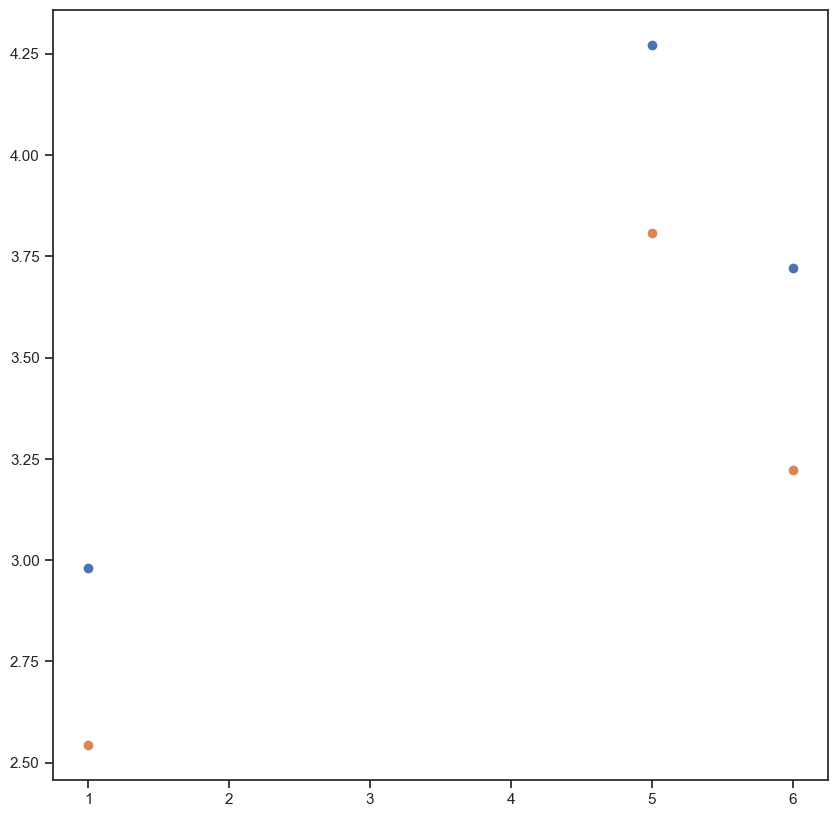

In [57]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.scatter([1, 5, 6], err1)
plt.scatter([1, 5, 6], err2)

## График важности признаков в дереве решений

Вычисление важности признаков основано на том, какое количество раз признак встречается в условиях дерева:

In [58]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

Проверим для модели с глубиной = 3:

In [59]:
list(zip(df.columns.values, model5.feature_importances_))

[('Unnamed: 0', 0.0),
 ('Gender', 0.0),
 ('EthnicGroup', 0.0),
 ('ParentEduc', 0.0),
 ('LunchType', 0.0),
 ('TestPrep', 0.0),
 ('ParentMaritalStatus', 0.0),
 ('PracticeSport', 0.0),
 ('IsFirstChild', 0.0),
 ('NrSiblings', 0.0),
 ('TransportMeans', 0.0),
 ('WklyStudyHours', 0.0),
 ('MathScore', 0.0),
 ('ReadingScore', 1.0)]

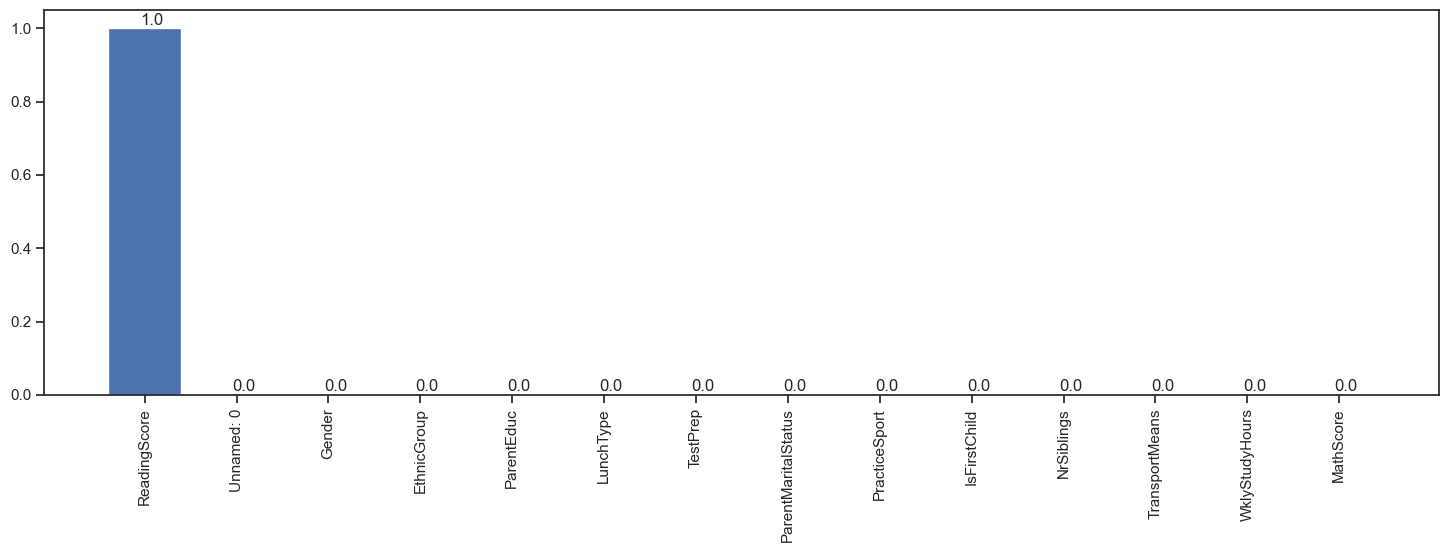

In [60]:
car_tree_cl_fl_1, car_tree_cl_fd_1 = draw_feature_importances(model5, df)

И для модели с глубиной = 5:

In [61]:

list(zip(df.columns.values, model6.feature_importances_))

[('Unnamed: 0', 0.0),
 ('Gender', 0.0),
 ('EthnicGroup', 0.0),
 ('ParentEduc', 0.0),
 ('LunchType', 0.0),
 ('TestPrep', 0.009345785546932543),
 ('ParentMaritalStatus', 0.0),
 ('PracticeSport', 0.0),
 ('IsFirstChild', 0.0),
 ('NrSiblings', 0.0),
 ('TransportMeans', 0.0),
 ('WklyStudyHours', 0.0),
 ('MathScore', 0.0),
 ('ReadingScore', 0.9906542144530674)]

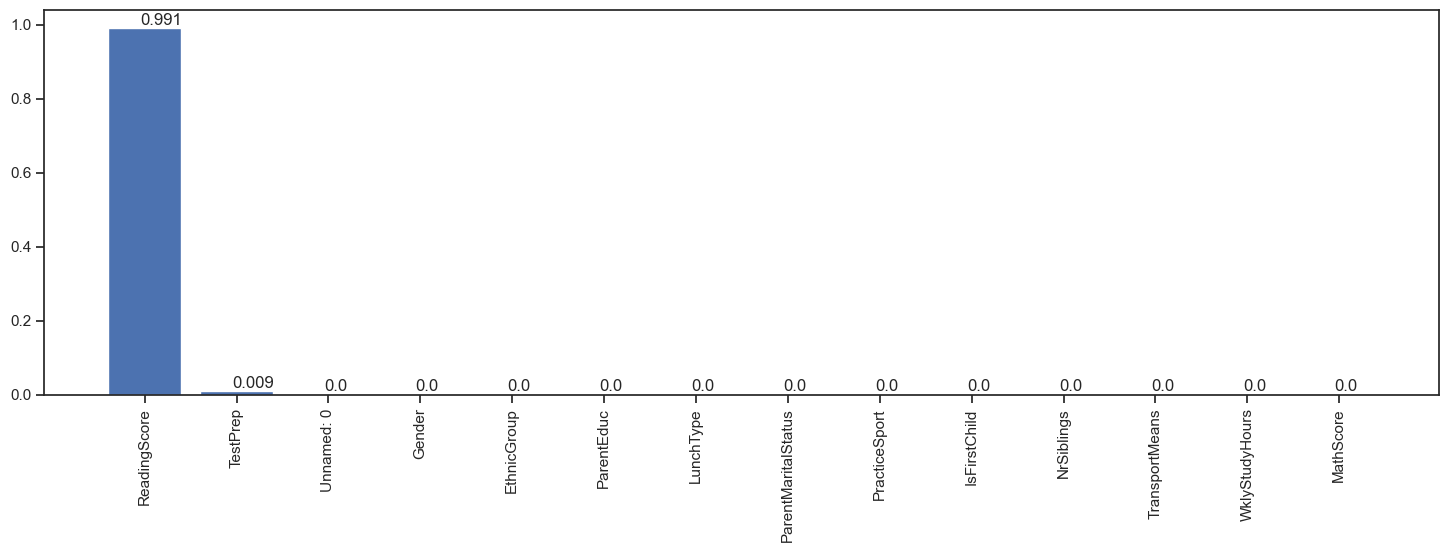

In [62]:
car_tree_cl_fl_2, car_tree_cl_fd_ = draw_feature_importances(model6, df)

## Визуализация деревьев решений и его правила

In [63]:
#pip install graphviz

In [64]:
#pip install pydotplus

In [65]:
from io import StringIO 
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

In [66]:
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [67]:
#pip install graphviz

In [68]:
#conda install -c anaconda python-graphviz

In [71]:
conda install -c conda-forge python-graphviz


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rocki\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2023.03  |           py39_0          66 KB
    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2023.5.7   |       h56e8100_0         145 KB  conda-forge
    cairo-1.16.0               |    h63a05c6_1001         5.2 MB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    conda-22.11.1              |   py39hcbf5309_1         908 KB  conda-forge
    expat-2.5.0                |       h63175ca_1         221 KB  conda-forge
    fribidi-1.0.10             |       h8d14728_0          63 KB  conda-forge
    getopt-win32-0.1           |       h8ffe710_0          19 KB  conda-forge
    glib-2.69.1     


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.10=py39_0
  - defaults/win-64::bkcharts==0.2=py39haa95532_1
  - defaults/win-64::dask==2022.7.0=py39haa95532_0
  - defaults/win-64::datashader==0.14.1=py39haa95532_0
  - defaults/win-64::holoviews==1.15.0=py39haa95532_0
  - defaults/win-64::hvplot==0.8.0=py39haa95532_0
  - defaults/noarch::intake==0.6.5=pyhd3eb1b0_0
  - defaults/noarch::seaborn==0.11.2=pyhd3eb1b0_0
  - defaults/win-64::statsmodels==0.13.2=py39h2bbff1b_0
  - defaults/noarch::xarray==0.20.1=pyhd3eb1b0_1


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




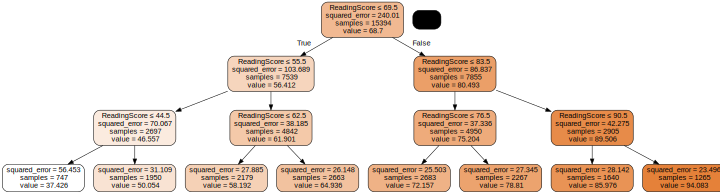

In [72]:
dot_data = export_graphviz(model5, out_file=None, 
                           feature_names=X_train.columns, 
                           class_names=df.ReadingScore, 
                           filled=True, rounded=True, special_characters=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size(10)
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

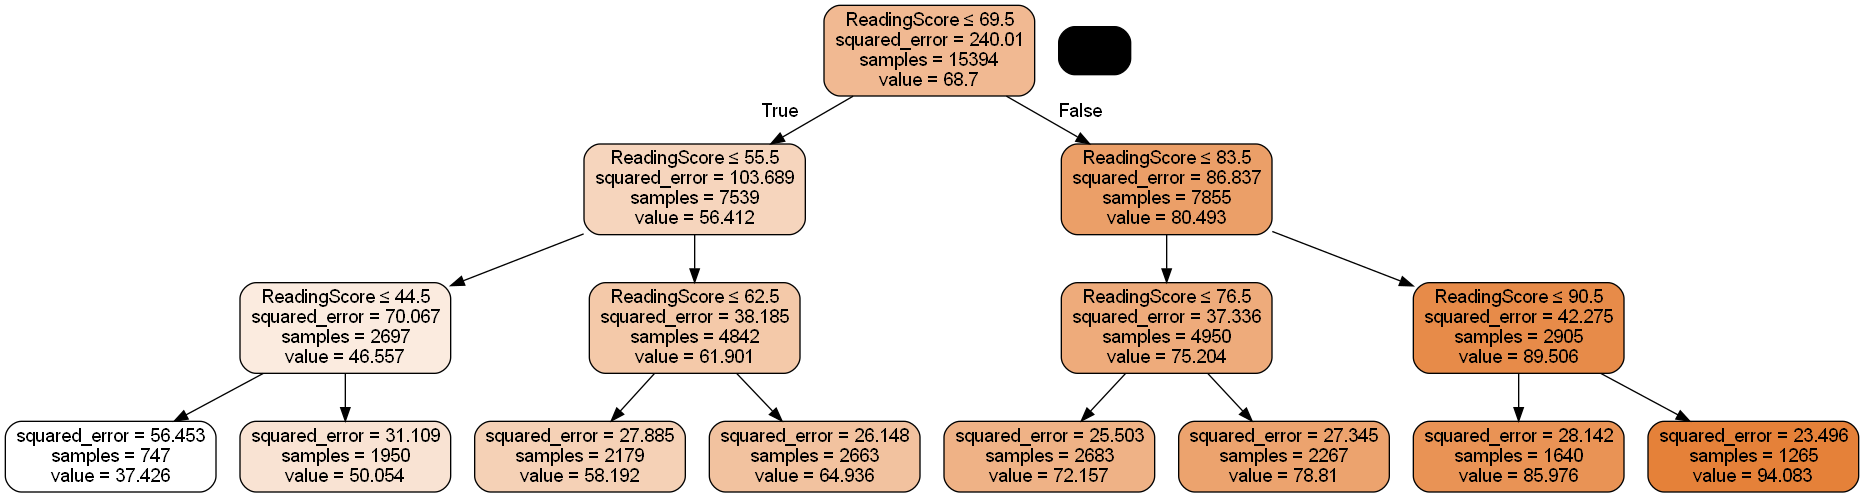

In [76]:
Image(get_png_tree(model5, X_train.columns), height='100%')

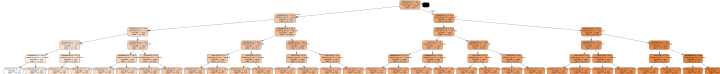

In [77]:
dot_data = export_graphviz(model6, out_file=None, 
                           feature_names=X_train.columns, 
                           class_names=df.ReadingScore, 
                           filled=True, rounded=True, special_characters=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size(10)
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

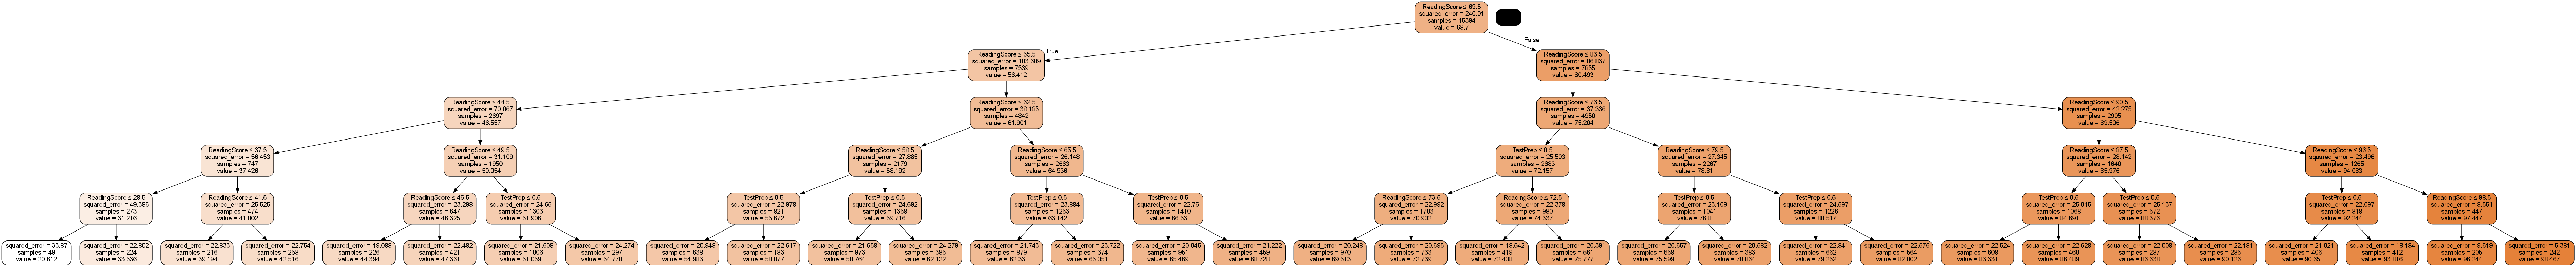

In [78]:
Image(get_png_tree(model6, X_train.columns), height='100%')

## Вывод правил дерева

Выведем правила для дерева с глубиной = 3:

In [81]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(model5, feature_names=list(X_train.columns))
HTML('<pre>' + tree_rules + '</pre>')

И для дерева с глубиной = 5:

In [82]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(model6, feature_names=list(X_train.columns))
HTML('<pre>' + tree_rules + '</pre>')